## Paqueterias

In [99]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

## Función de Pagos

In [100]:
def calcular_pagos(jugador1, jugador2):
    cuenta1 = []
    cuenta2 = []
    puntos1 = 0
    puntos2 = 0

    for i in range(len(jugador1)):
        play1 = jugador1[i]
        play2 = jugador2[i]

        if play1 == 1 and play2 == 1: 
            puntos1 += 3
            puntos2 += 3
        elif play1 == 1 and play2 == 0:
            puntos1 += 0
            puntos2 += 5
        elif play1 == 0 and play2 == 1:
            puntos1 += 5
            puntos2 += 0    
        else:
            puntos1 += 1
            puntos2 += 1

        cuenta1.append(puntos1)
        cuenta2.append(puntos2)
    return cuenta1, cuenta2

def grafica_pagos(df, nombres, j_fijo):
    plt.figure(figsize=(12, 8))

    for i in range(len(nombres)):
        plt.subplot(2, 4, i + 1)
        plt.plot(df[i]['Ronda'], df[i][f'Pago {j_fijo}'], label=f'Pago {j_fijo}', color='orange')
        plt.plot(df[i]['Ronda'], df[i][f'Pago {nombres[i]}'], label=f'Pago {nombres[i]}', color='cornflowerblue')
        plt.title(f'{j_fijo} vs {nombres[i]}')
        plt.xlabel('Ronda')
        plt.ylabel('Pago')
        plt.legend()

    plt.tight_layout()
    plt.show()

def graficar_ganancias(df, nombres):
    jugadores = []
    total = []

    for i in range(len(df)):
        nombre = nombres[i]
        jugadores.append(nombre)
        total.append(df[i][f'Pago {nombre}'].iloc[-1])

    plt.figure(figsize=(10, 6))
    plt.bar(jugadores, total, color='skyblue')
    plt.title('Ganancias acumuladas por jugador')
    plt.ylabel('Ganancias')
    plt.xlabel('Jugador')
    plt.show()


   

## Jugadores

In [101]:
random.seed(42)
aleatorio = []

for i in range(1000):
    aleatorio.append(np.random.randint(0,2))

def Rick (aleatorio):
    Rick_play = []
    ceros_Rick = 0

    for i in range(0, len(aleatorio)):   
        if i == 0:
            Rick_play.append(1)
        elif ceros_Rick >= 2:
            Rick_play.append(0)
        else:
            Rick_play.append(aleatorio[i-1])
            if aleatorio[i]==0:
                ceros_Rick +=1
            else:
                ceros_Rick = 0
    return Rick_play

def Friedman (aleatorio):
    Friedman_play = []
    ceros_friedman = 0 

    for i in range(0, len(aleatorio)):  
        if  i == 0:
            Friedman_play.append(1) 
        elif ceros_friedman > 0:
            Friedman_play.append(0)  
        else:
            Friedman_play.append(aleatorio[i-1])  
        if aleatorio[i] == 0:
            ceros_friedman +=1
    return Friedman_play

def Joss (aleatorio):
    Joss_play = []

    for i in range(0, len(aleatorio)):
        if i == 0:
            Joss_play.append(1)
        elif (i + 1) % 10 == 0:
            Joss_play.append(0)
        else:
            Joss_play.append(aleatorio[i - 1])
    return Joss_play

def GraasKamp (aleatorio):
    GraasKamp_play = []

    for i in range(0, len(aleatorio)):
        if i == 0:
            GraasKamp_play.append(1)
        elif (i + 1) % 20 == 0:
            GraasKamp_play.append(0)
        else:
            GraasKamp_play.append(aleatorio[i - 1])
    return GraasKamp_play

def Tit_for_Tat (aleatorio):
    Tit_for_tat_play= []
    
    for i in range(0, len(aleatorio)):
        if i == 0:
            Tit_for_tat_play.append(1)
        else:
            Tit_for_tat_play.append(aleatorio[i -1])
    return Tit_for_tat_play

def Tester (aleatorio):
    Tester_plays = []
    Tester_plays.append(0)
    Tester_plays.append(1)  
    if aleatorio[1] == 0:
        for i in range(2, len(aleatorio)):
            Tester_plays.append(aleatorio[i - 1])
    else:
        for i in range(2, len(aleatorio)):
            Tester_plays.append((i-2) % 2) 
    return Tester_plays

def Tit_for_2Tat (aleatorio):
    Tit_for_2Tat_play = []
    ceros = 0
    
    for i in range(0, len(aleatorio)):
        if i == 0:
            Tit_for_2Tat_play.append(1)
            continue
        if aleatorio[i - 1] == 0:
            ceros += 1
        else :
            ceros = 0
        if ceros == 2:
            Tit_for_2Tat_play.append(1)  
            ceros = 0  
        else:
            Tit_for_2Tat_play.append(aleatorio[i - 1])  

    return Tit_for_2Tat_play

def Random_player (aleatorio):
    random_play = []
    for _ in range(0, len(aleatorio)):
        random_play.append(random.randint(0, 1))
    return random_play



In [102]:
dataframe = pd.DataFrame ({
    'Aleatorio': aleatorio,
    'jugador': Random_player(aleatorio)
}).T
dataframe

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Aleatorio,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,1,1,1,0,0,1
jugador,0,0,1,0,0,0,0,0,1,0,...,1,0,1,1,0,1,1,0,0,1


## Todos vs Aleatorio

In [103]:
nombres_aleatorio = ['Rick', 'Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester', 'Tit_for_2Tat', 'Random']
jugadores = [Rick, Friedman, Joss, GraasKamp, Tit_for_Tat, Tester, Tit_for_2Tat, Random_player]

df_aleatorio = []

for i in range(len(nombres_aleatorio)):
    player = nombres_aleatorio[i]
    funcion = jugadores[i]
    
    jugadas = funcion(aleatorio)
    
    pagosj1, pagosj2 = calcular_pagos(aleatorio, jugadas)
    
    df2 = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Aleatorio': aleatorio,
        player: jugadas,
        'Pago Aleatorio': pagosj1,
        f'Pago {player}': pagosj2
    })
    
    df_aleatorio.append(df2)

df_aleatorio[0]



,Ronda,Aleatorio,Rick,Pago Aleatorio,Pago Rick
0,1,0,1,5,0
1,2,0,0,6,1
2,3,0,0,7,2
3,4,0,0,8,3
4,5,0,0,9,4
...,...,...,...,...,...
995,996,1,0,519,2919
996,997,1,0,519,2924
997,998,0,0,520,2925
998,999,0,0,521,2926


## Gráficas

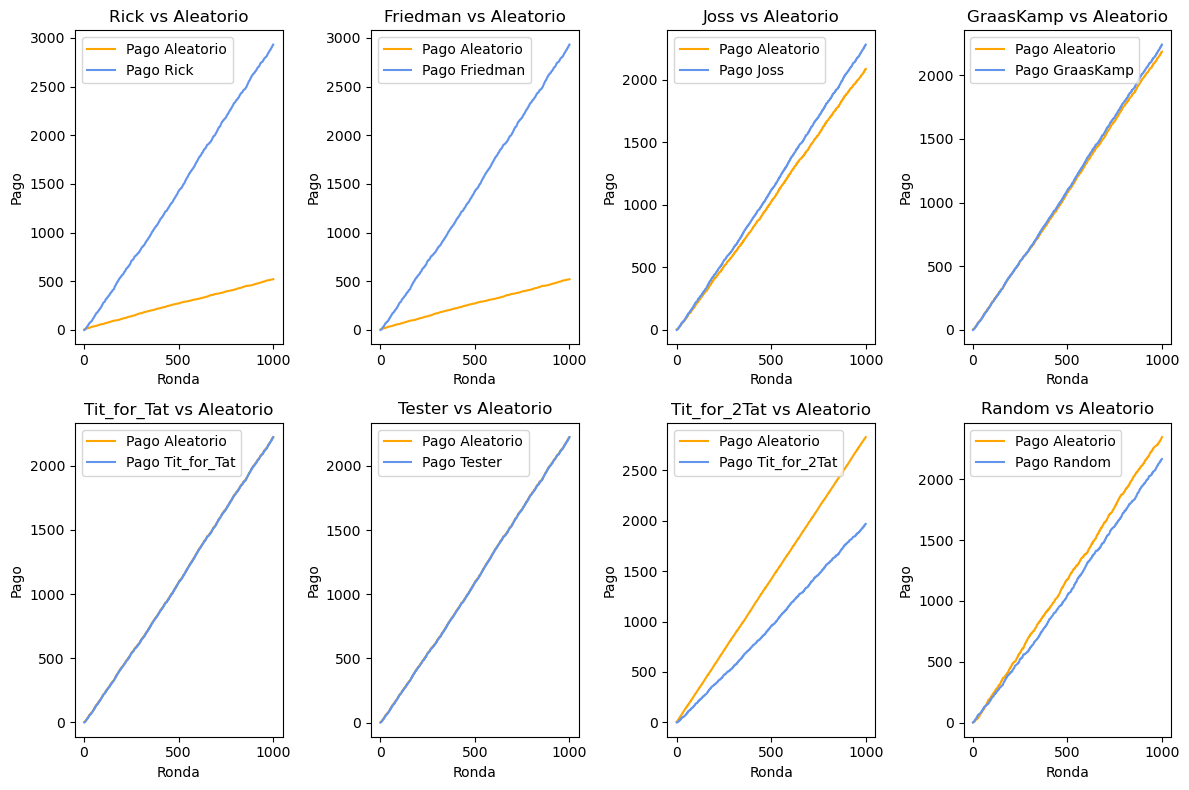

In [104]:
def grafica_pagos_aleatorio (df_aleatorio, nombres_aleatorio):
    plt.figure(figsize=(12, 8))

    for i in range(len(nombres_aleatorio)):
        plt.subplot(2, 4, i+1)
        plt.plot(df_aleatorio[i]['Ronda'], df_aleatorio[i]['Pago Aleatorio'], label='Pago Aleatorio', color='orange')
        plt.plot(df_aleatorio[i]['Ronda'], df_aleatorio[i][f'Pago {nombres_aleatorio[i]}'], label=f'Pago {nombres_aleatorio[i]}', color='cornflowerblue')
        plt.title(f'{nombres_aleatorio[i]} vs Aleatorio')
        plt.xlabel('Ronda')
        plt.ylabel('Pago')
        plt.legend()

    plt.tight_layout()
    plt.show()

grafica_pagos_aleatorio(df_aleatorio, nombres_aleatorio)

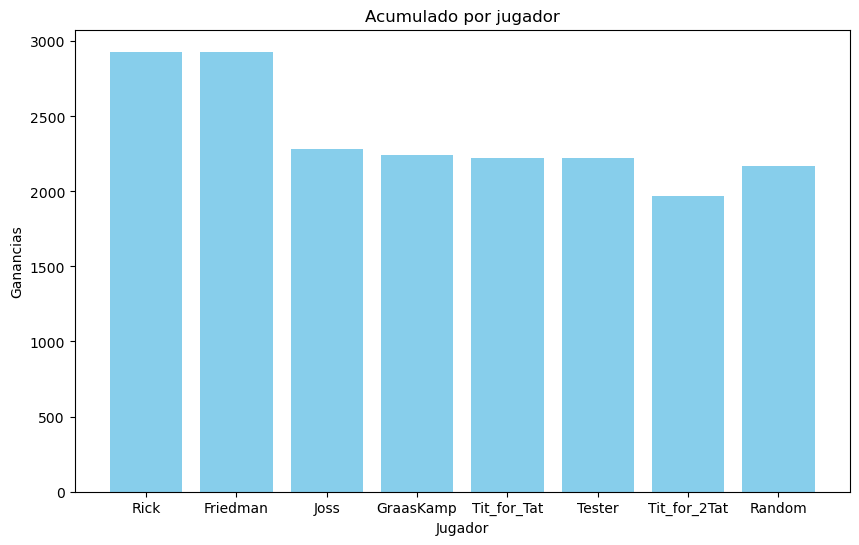

In [105]:
def graficar_ganancias(df_aleatorio, nombres_aleatorio):
    jugadores = []
    total = []

    for i in range(len(df_aleatorio)):
        nombre = nombres_aleatorio[i]
        jugadores.append(nombre)
        total.append(df_aleatorio[i][f'Pago {nombre}'].iloc[-1])

    plt.figure(figsize=(10, 6))
    plt.bar(jugadores, total, color='skyblue')
    plt.title('Acumulado por jugador')
    plt.ylabel('Ganancias')
    plt.xlabel('Jugador')
    plt.show()

graficar_ganancias(df_aleatorio, nombres_aleatorio)

## Todos vs Rick

In [106]:
Rick_game = Rick(aleatorio)

nombres_Rick = ['Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester', 'Tit_for_2Tat', 'Random']
oponentes_Rick = [Friedman, Joss, GraasKamp, Tit_for_Tat, Tester, Tit_for_2Tat, Random_player]

df_Rick = []

for i in range(len(nombres_Rick)):
    nombre = nombres_Rick[i]
    funcion = oponentes_Rick[i]

    plays_op = funcion(Rick_game)  
    pagos_Rick, pagos_oponente = calcular_pagos(Rick_game, plays_op)

    df2_Rick = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Rick': Rick_game,
        nombre: plays_op,
        'Pago Rick': pagos_Rick,
        f'Pago {nombre}': pagos_oponente
    })

    df_Rick.append(df2_Rick)

df_Rick[1]


,Ronda,Rick,Joss,Pago Rick,Pago Joss
0,1,1,1,3,3
1,2,0,1,8,3
2,3,0,0,9,4
3,4,0,0,10,5
4,5,0,0,11,6
...,...,...,...,...,...
995,996,0,0,1002,997
996,997,0,0,1003,998
997,998,0,0,1004,999
998,999,0,0,1005,1000


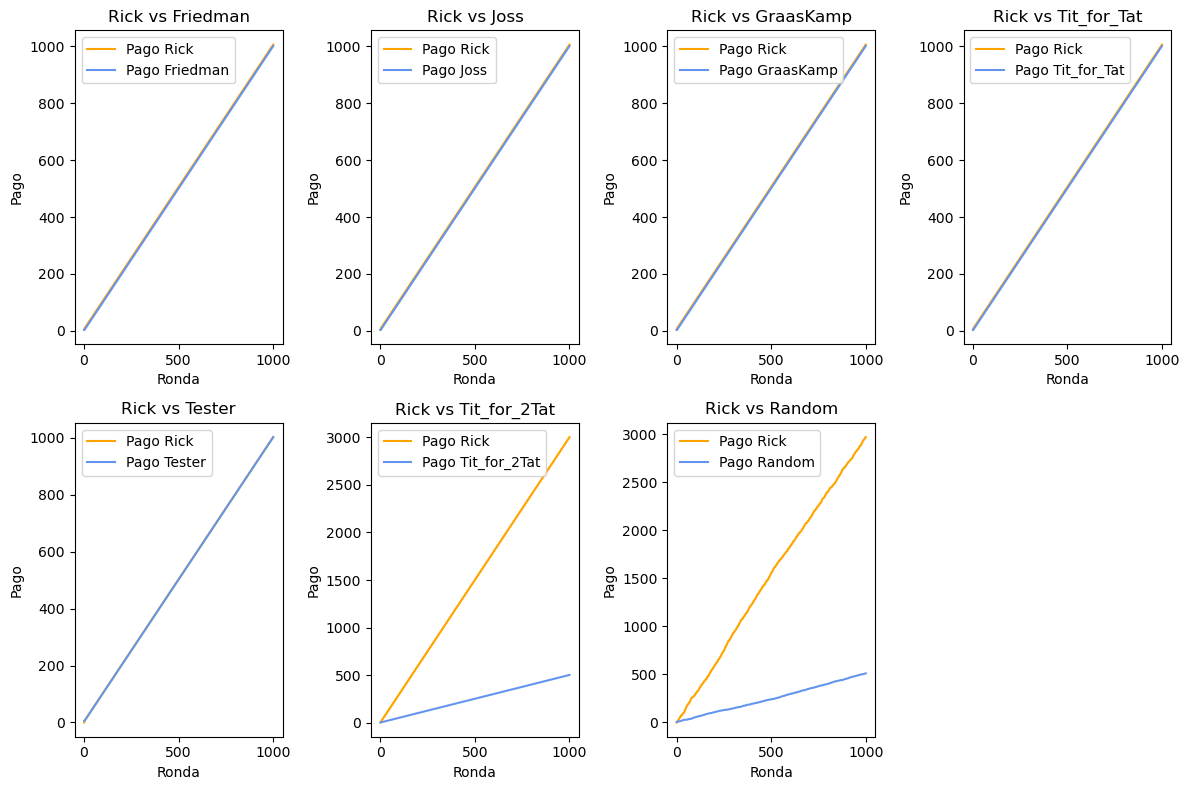

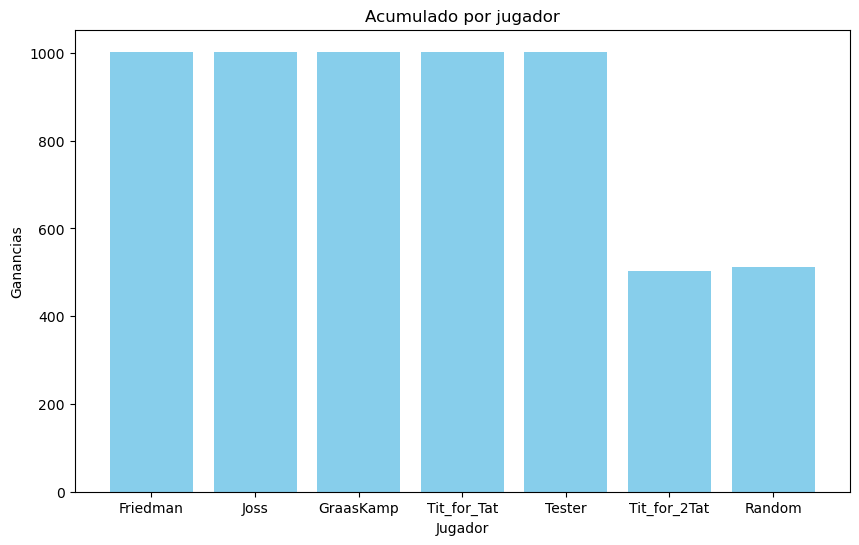

In [107]:
grafica_pagos(df_Rick, nombres_Rick, 'Rick')
graficar_ganancias(df_Rick, nombres_Rick)

## Todos vs Friedman

In [108]:
Friedman_game = Friedman(aleatorio)

nombres_Friedman = ['Rick', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester', 'Tit_for_2Tat', 'Random' ]
oponentes_Friedman = [Rick, Joss, GraasKamp, Tit_for_Tat, Tester, Tit_for_2Tat, Random_player]

df_Friedman = []

for i in range(len(nombres_Friedman)):
    nombre = nombres_Friedman[i]
    funcion = oponentes_Friedman[i]

    plays_op = funcion(Friedman_game)  
    pagos_Friedman, pagos_oponente = calcular_pagos(Friedman_game, plays_op)

    df2_Friedman = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Friedman': Friedman_game,
        nombre: plays_op,
        'Pago Friedman': pagos_Friedman,
        f'Pago {nombre}': pagos_oponente
    })

    df_Friedman.append(df2_Friedman)

df_Friedman[1]

,Ronda,Friedman,Joss,Pago Friedman,Pago Joss
0,1,1,1,3,3
1,2,0,1,8,3
2,3,0,0,9,4
3,4,0,0,10,5
4,5,0,0,11,6
...,...,...,...,...,...
995,996,0,0,1002,997
996,997,0,0,1003,998
997,998,0,0,1004,999
998,999,0,0,1005,1000


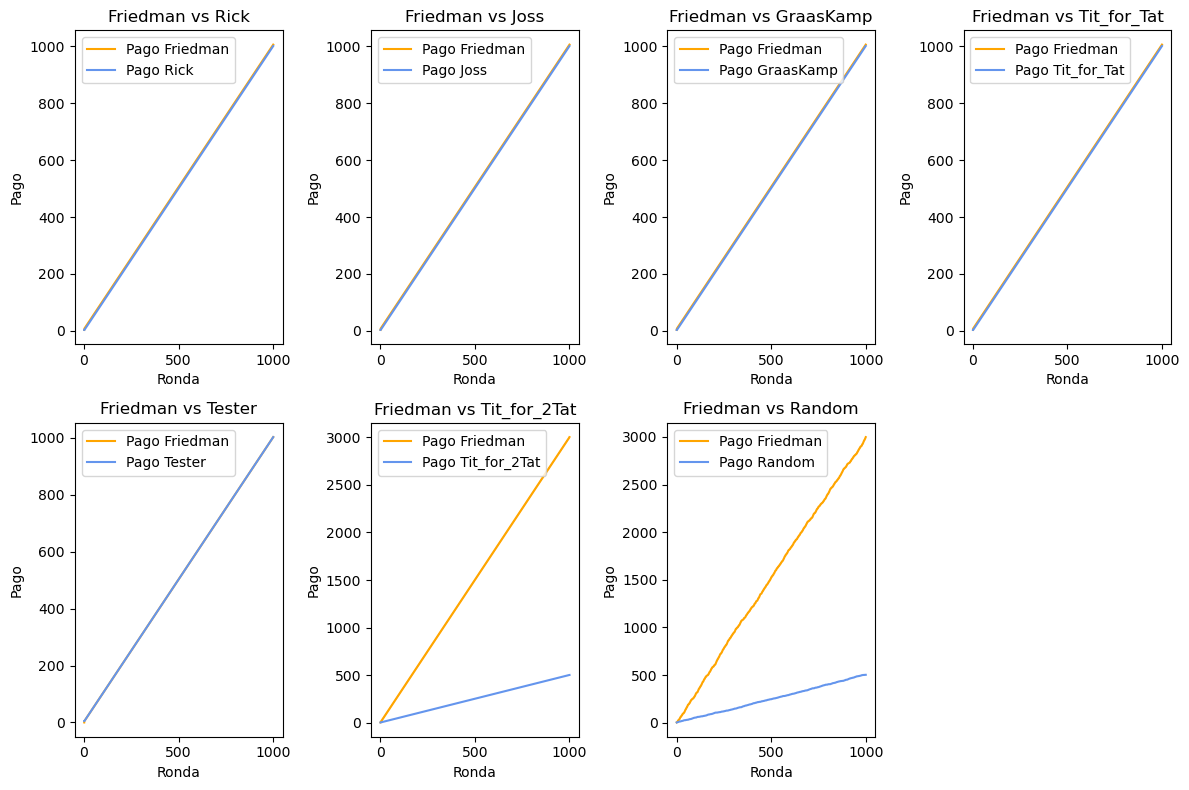

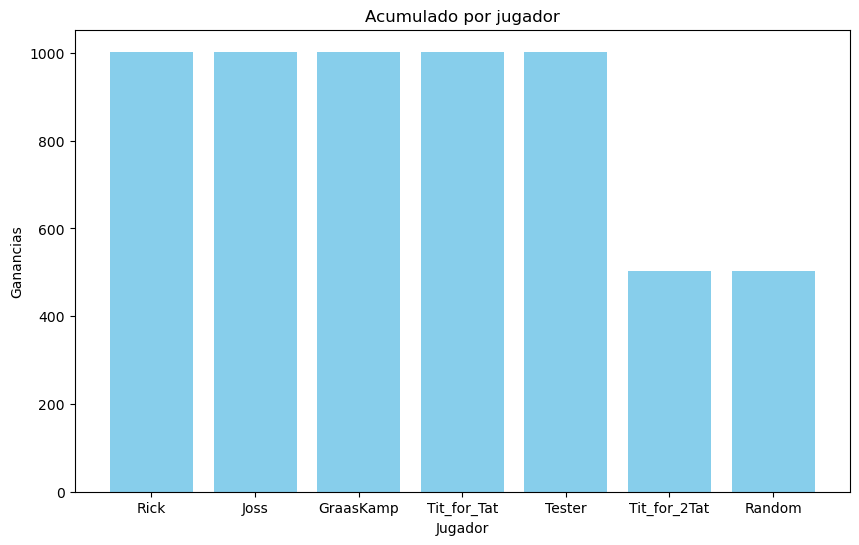

In [109]:
grafica_pagos(df_Friedman, nombres_Friedman, 'Friedman')
graficar_ganancias(df_Friedman, nombres_Friedman)

## Todos vs Joss

In [110]:
Joss_game = Joss(aleatorio)

nombres_Joss = ['Rick', 'Friedman', 'GraasKamp', 'Tit_for_Tat', 'Tester', 'Tit_for_2Tat', 'Random']
oponentes_Joss = [Rick, Friedman, GraasKamp, Tit_for_Tat, Tester, Tit_for_2Tat, Random_player]

df_Joss = []

for i in range(len(nombres_Joss)):
    nombre = nombres_Joss[i]
    funcion = oponentes_Joss[i]

    plays_op = funcion(Joss_game)  
    pagos_Joss, pagos_oponente = calcular_pagos(Joss_game, plays_op)

    df2_Joss = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Joss': Joss_game,
        nombre: plays_op,
        'Pago Joss': pagos_Joss,
        f'Pago {nombre}': pagos_oponente
    })

    df_Joss.append(df2_Joss)

df_Joss[1]

,Ronda,Joss,Friedman,Pago Joss,Pago Friedman
0,1,1,1,3,3
1,2,0,1,8,3
2,3,0,0,9,4
3,4,0,0,10,5
4,5,0,0,11,6
...,...,...,...,...,...
995,996,1,0,561,2761
996,997,1,0,561,2766
997,998,1,0,561,2771
998,999,0,0,562,2772


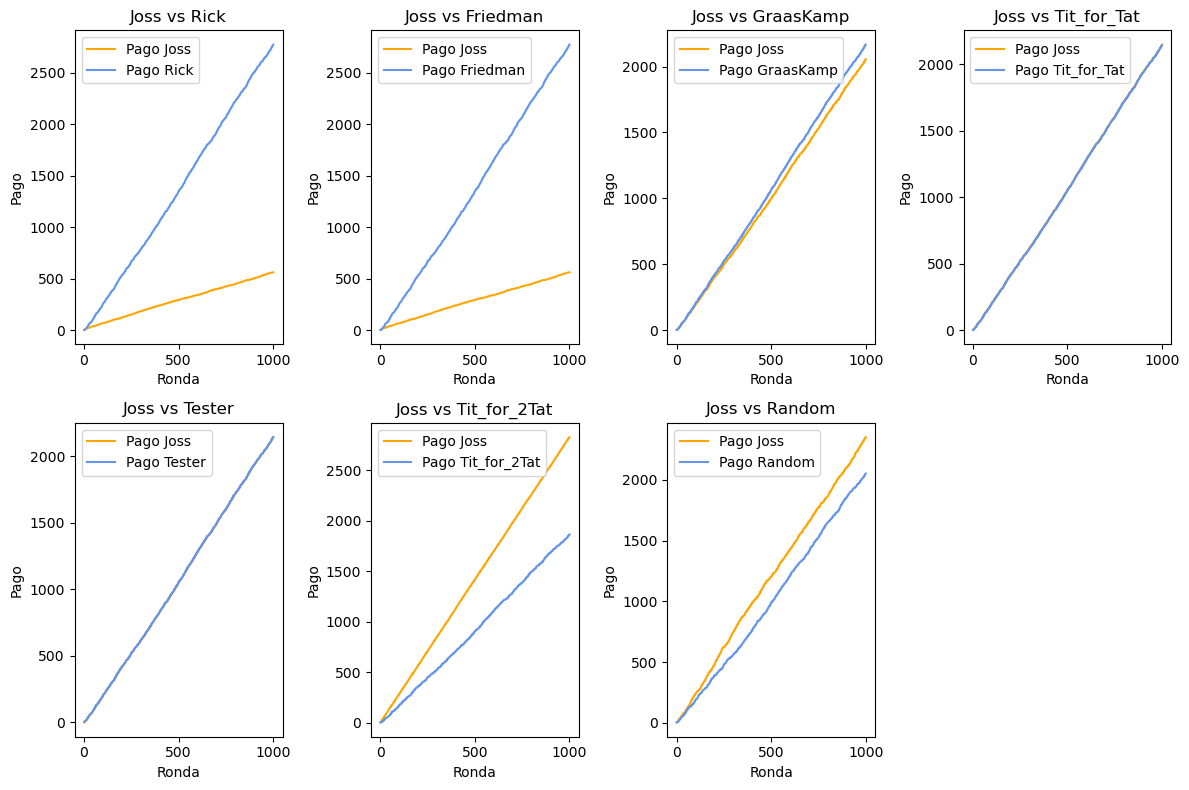

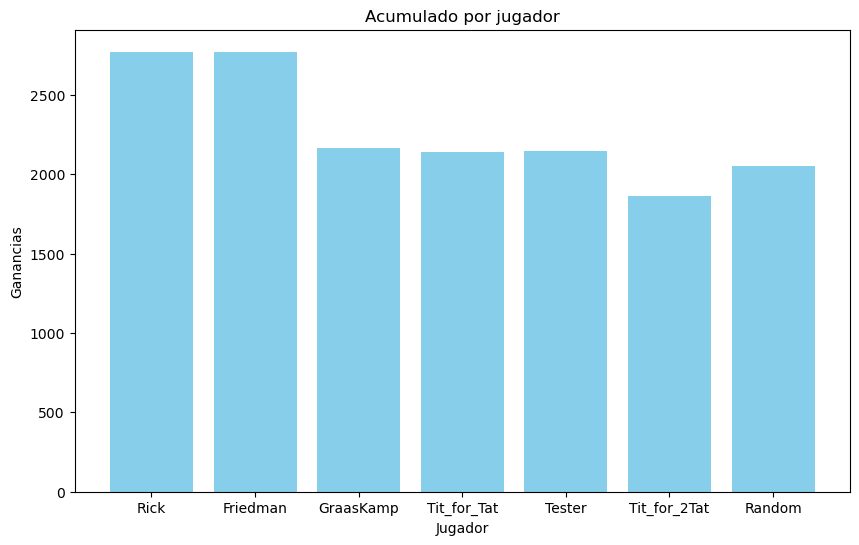

In [111]:
grafica_pagos(df_Joss, nombres_Joss, 'Joss')
graficar_ganancias(df_Joss, nombres_Joss)

## Todos vs GraasKamp

In [112]:
GraasKamp_game = GraasKamp(aleatorio)

nombres_GraasKamp = ['Rick', 'Friedman', 'Joss', 'Tit_for_Tat', 'Tester', 'Tit_for_2Tat', 'Random']
oponentes_GraasKamp = [Rick, Friedman, Joss, Tit_for_Tat, Tester, Tit_for_2Tat, Random_player]

df_GraasKamp = []

for i in range(len(nombres_GraasKamp)):
    nombre = nombres_GraasKamp[i]
    funcion = oponentes_GraasKamp[i]

    plays_op = funcion(GraasKamp_game)  
    pagos_GraasKamp, pagos_oponente = calcular_pagos(GraasKamp_game, plays_op)

    df2_GraasKamp = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'GraasKamp': GraasKamp_game,
        nombre: plays_op,
        'Pago GraasKamp': pagos_GraasKamp,
        f'Pago {nombre}': pagos_oponente
    })

    df_GraasKamp.append(df2_GraasKamp)

df_GraasKamp[4]

,Ronda,GraasKamp,Tester,Pago GraasKamp,Pago Tester
0,1,1,0,0,5
1,2,0,1,5,5
2,3,0,0,6,6
3,4,0,0,7,7
4,5,0,0,8,8
...,...,...,...,...,...
995,996,1,0,2189,2194
996,997,1,1,2192,2197
997,998,1,1,2195,2200
998,999,0,1,2200,2200


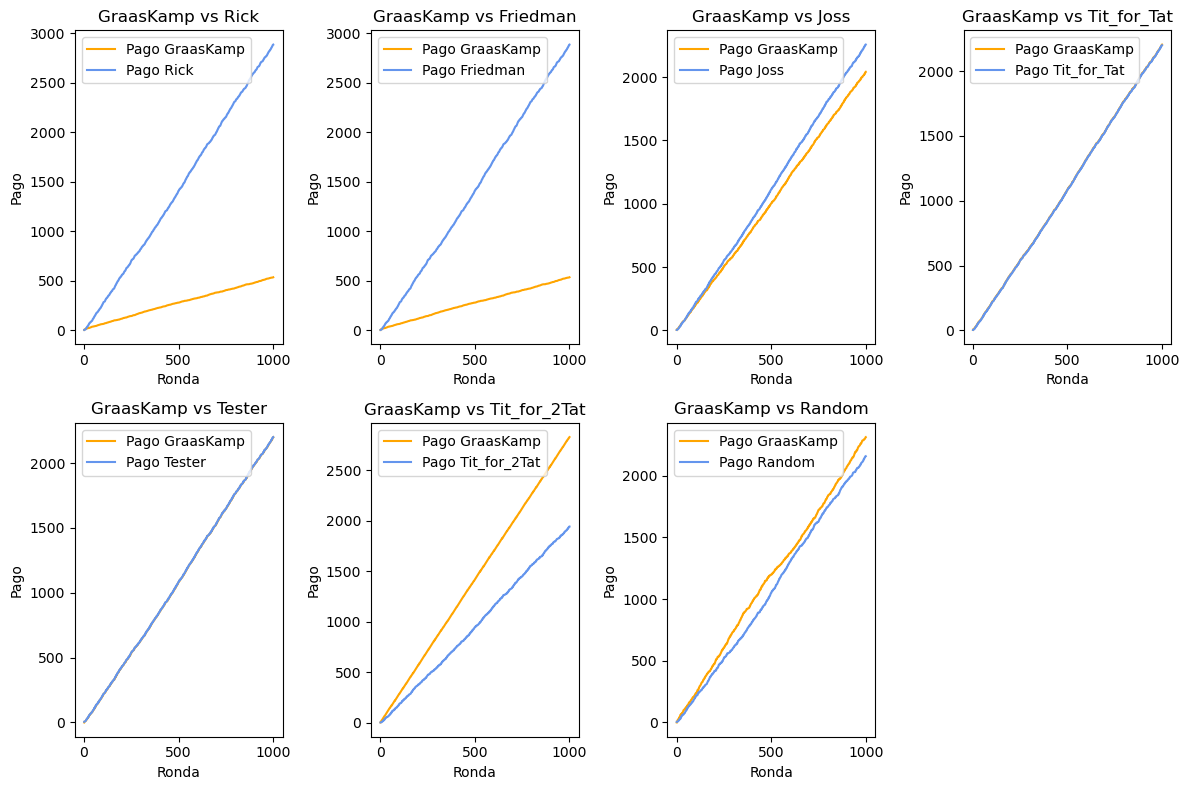

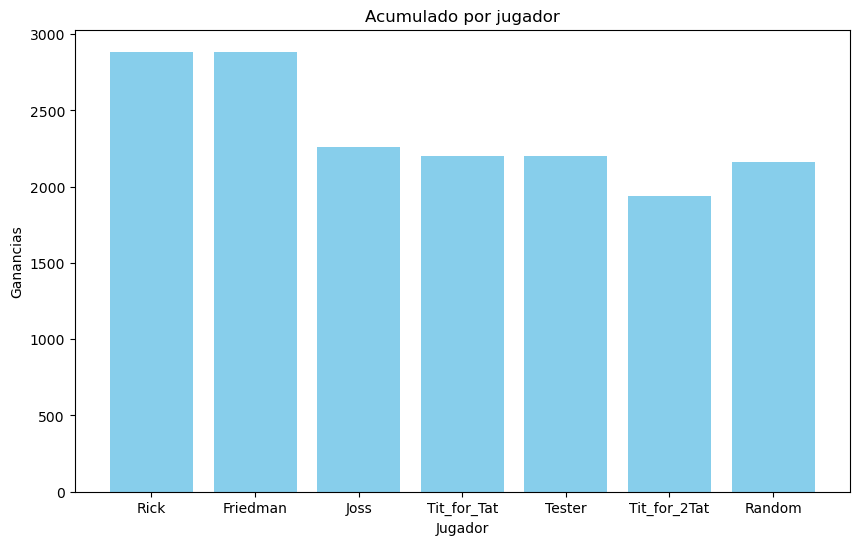

In [113]:
grafica_pagos(df_GraasKamp, nombres_GraasKamp, 'GraasKamp')
graficar_ganancias(df_GraasKamp, nombres_GraasKamp)

## Todos vs Tit_for_Tat

In [114]:
Tit_for_Tat_game = Tit_for_Tat(aleatorio)

nombres_TFT = ['Rick', 'Friedman', 'Joss', 'GraasKamp', 'Tester', 'Tit_for_2Tat', 'Random']
oponentes_TFT = [Rick, Friedman, Joss, GraasKamp, Tester, Tit_for_2Tat, Random_player]

df_TFT = []

for i in range(len(nombres_TFT)):
    nombre = nombres_TFT[i]
    funcion = oponentes_TFT[i]

    plays_op = funcion(Tit_for_Tat_game)  
    pagos_TFT, pagos_oponente = calcular_pagos(Tit_for_Tat_game, plays_op)

    df2_TFT = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Tit_for_Tat': Tit_for_Tat_game,
        nombre: plays_op,
        'Pago Tit_for_Tat': pagos_TFT,
        f'Pago {nombre}': pagos_oponente
    })

    df_TFT.append(df2_TFT)

df_TFT[1]


,Ronda,Tit_for_Tat,Friedman,Pago Tit_for_Tat,Pago Friedman
0,1,1,1,3,3
1,2,0,1,8,3
2,3,0,0,9,4
3,4,0,0,10,5
4,5,0,0,11,6
...,...,...,...,...,...
995,996,1,0,522,2917
996,997,1,0,522,2922
997,998,1,0,522,2927
998,999,0,0,523,2928


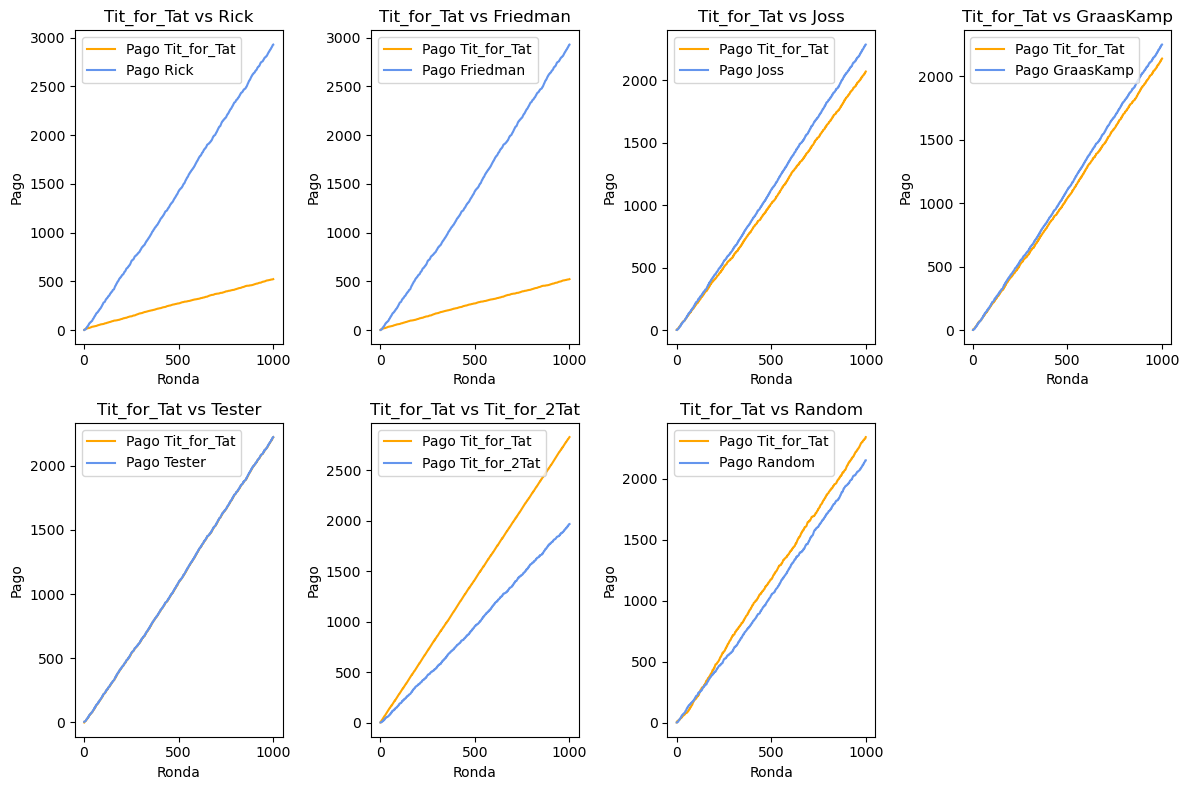

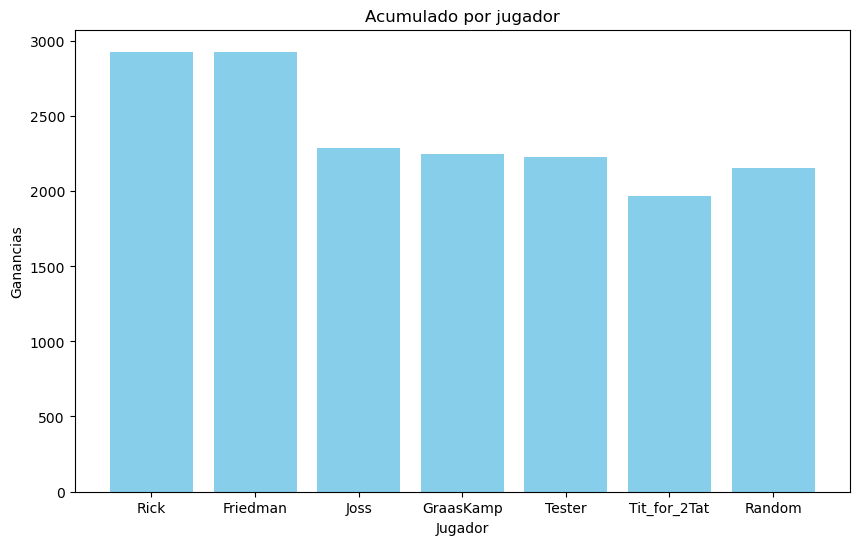

In [115]:
grafica_pagos(df_TFT, nombres_TFT, 'Tit_for_Tat')
graficar_ganancias(df_TFT, nombres_TFT)

## Todos vs Tester

In [116]:
Tester_game = Tester(aleatorio)

nombres_Tester = ['Rick', 'Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tit_for_2Tat', 'Random']
oponentes_Tester = [Rick, Friedman, Joss, GraasKamp, Tit_for_Tat, Tit_for_2Tat, Random_player]

df_Tester = []

for i in range(len(nombres_Tester)):
    nombre = nombres_Tester[i]
    funcion = oponentes_Tester[i]

    plays_op = funcion(Tester_game)  
    pagos_Tester, pagos_oponente = calcular_pagos(Tester_game, plays_op)

    df2_Tester = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Tester': Tester_game,
        nombre: plays_op,
        'Pago Tester': pagos_Tester,
        f'Pago {nombre}': pagos_oponente
    })

    df_Tester.append(df2_Tester)

df_Tester[1]


,Ronda,Tester,Friedman,Pago Tester,Pago Friedman
0,1,0,1,5,0
1,2,1,0,5,5
2,3,0,0,6,6
3,4,0,0,7,7
4,5,0,0,8,8
...,...,...,...,...,...
995,996,1,0,519,2919
996,997,1,0,519,2924
997,998,1,0,519,2929
998,999,0,0,520,2930


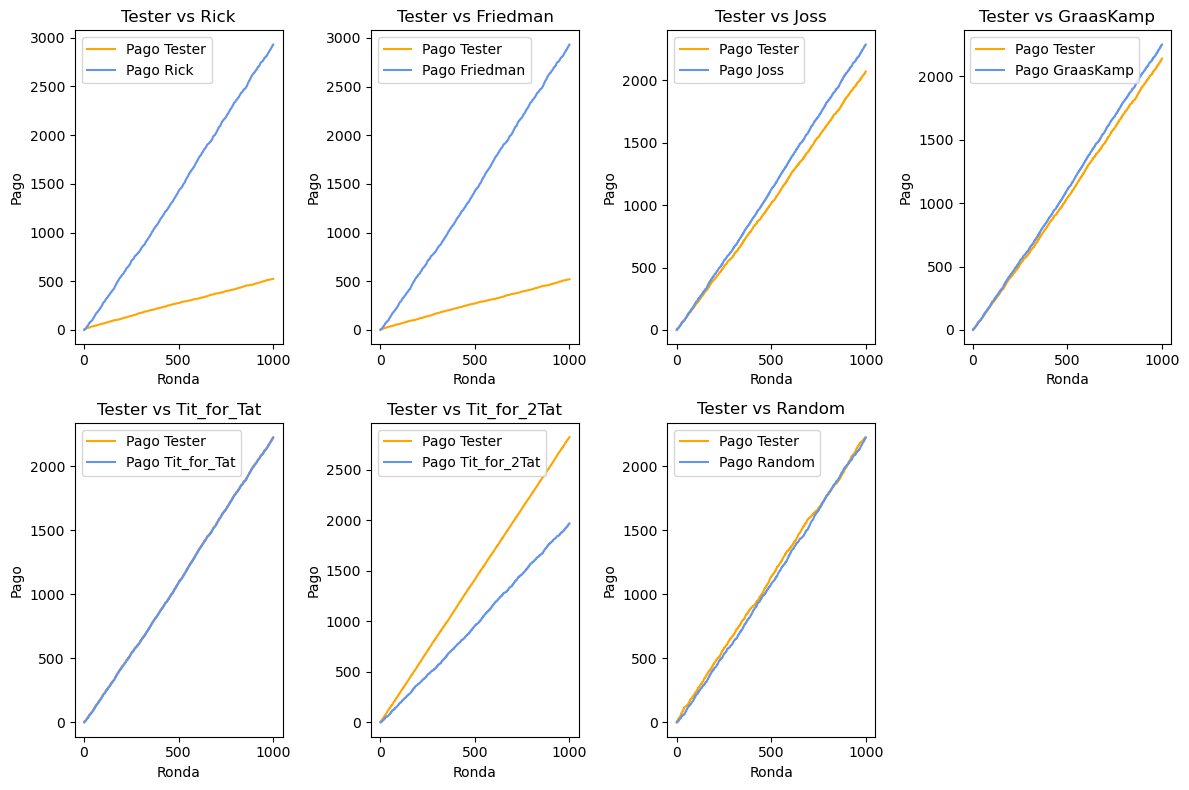

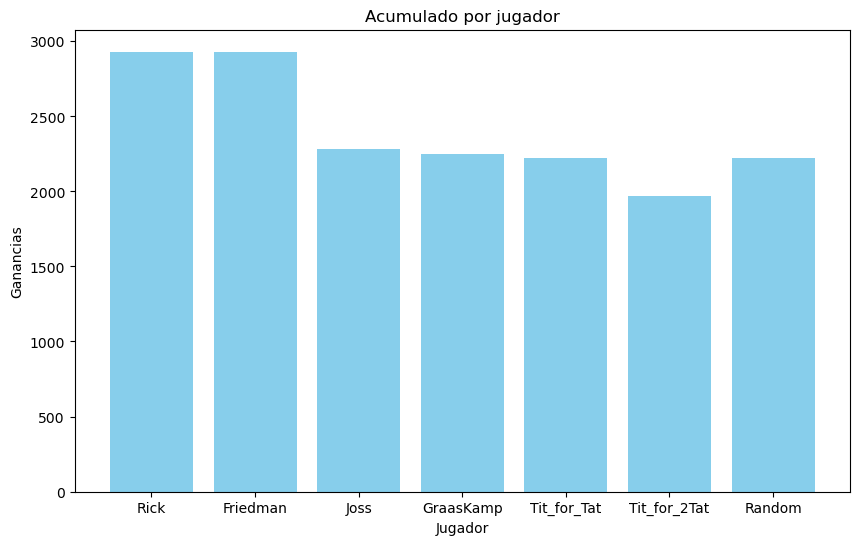

In [117]:
grafica_pagos(df_Tester, nombres_Tester, 'Tester')
graficar_ganancias(df_Tester, nombres_Tester)

## Todos vs Tit_for_2Tat

In [118]:
Tit_for_2Tat_game = Tit_for_2Tat(aleatorio)

nombres_T2T = ['Rick', 'Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester', 'Random']
oponentes_T2T = [Rick, Friedman, Joss, GraasKamp, Tit_for_Tat, Tester, Random_player]

df_T2T = []

for i in range(len(nombres_T2T)):
    nombre = nombres_T2T[i]
    funcion = oponentes_T2T[i]

    plays_op = funcion(Tit_for_2Tat_game)
    pagos_T2T, pagos_oponente = calcular_pagos(Tit_for_2Tat_game, plays_op)

    df2_T2T = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Tit_for_2Tat': Tit_for_2Tat_game,
        nombre: plays_op,
        'Pago Tit_for_2Tat': pagos_T2T,
        f'Pago {nombre}': pagos_oponente
    })

    df_T2T.append(df2_T2T)

df_T2T[1]


,Ronda,Tit_for_2Tat,Friedman,Pago Tit_for_2Tat,Pago Friedman
0,1,1,1,3,3
1,2,0,1,8,3
2,3,1,0,8,8
3,4,0,0,9,9
4,5,1,0,9,14
...,...,...,...,...,...
995,996,1,0,351,3601
996,997,1,0,351,3606
997,998,1,0,351,3611
998,999,0,0,352,3612


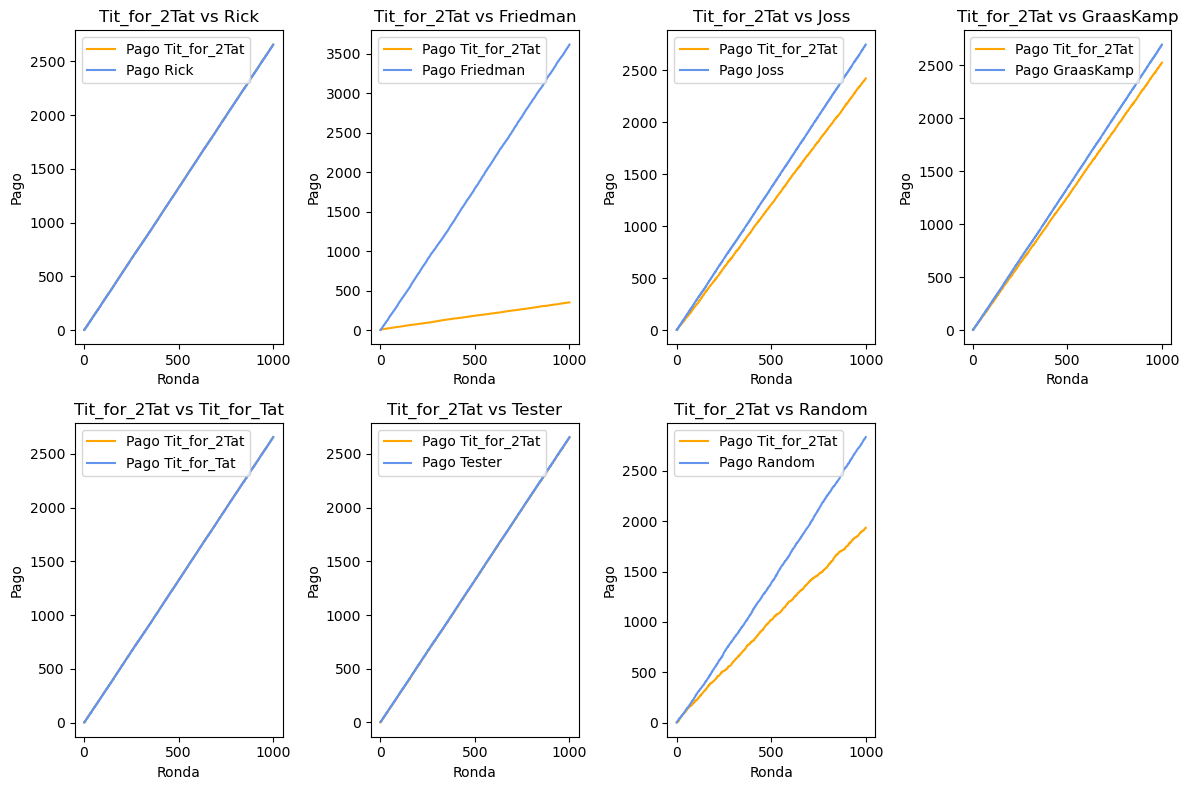

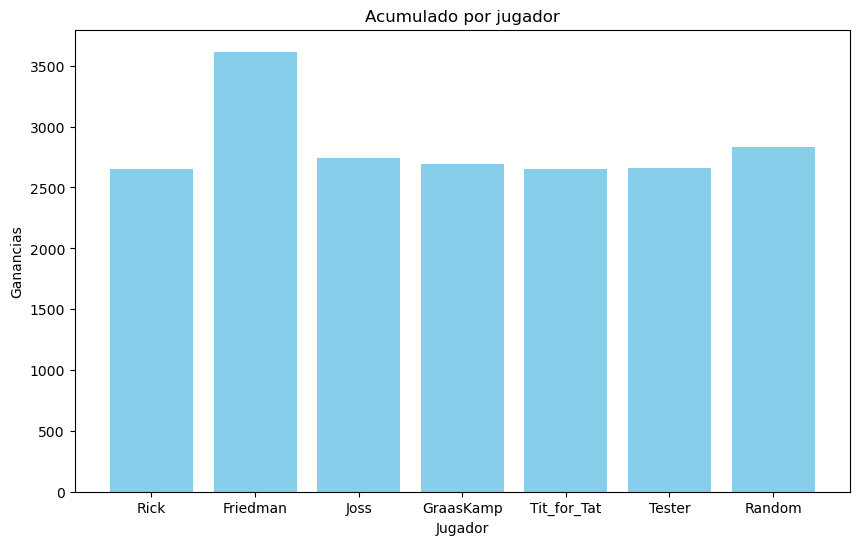

In [119]:
grafica_pagos(df_T2T, nombres_T2T, 'Tit_for_2Tat')
graficar_ganancias(df_T2T, nombres_T2T)

## Todos vs Aleatorio

In [120]:
Random_game = Random_player(aleatorio)

nombres_random = ['Rick', 'Friedman', 'Joss', 'GraasKamp', 'Tit_for_Tat', 'Tester', 'Tit_for_2Tat']
oponentes_random = [Rick, Friedman, Joss, GraasKamp, Tit_for_Tat, Tester, Tit_for_2Tat]

df_random = []

for i in range(len(nombres_random)):
    nombre = nombres_random[i]
    funcion = oponentes_random[i]

    plays_op = funcion(Random_game)
    pagos_random, pagos_oponente = calcular_pagos(Random_game, plays_op)

    df2_random = pd.DataFrame({
        'Ronda': list(range(1, len(aleatorio) + 1)),
        'Random': Random_game,
        nombre: plays_op,
        'Pago Random': pagos_random,
        f'Pago {nombre}': pagos_oponente
    })

    df_random.append(df2_random)

df_random[1]  


,Ronda,Random,Friedman,Pago Random,Pago Friedman
0,1,0,1,5,0
1,2,0,0,6,1
2,3,1,0,6,6
3,4,0,0,7,7
4,5,0,0,8,8
...,...,...,...,...,...
995,996,0,0,500,2995
996,997,0,0,501,2996
997,998,1,0,501,3001
998,999,1,0,501,3006


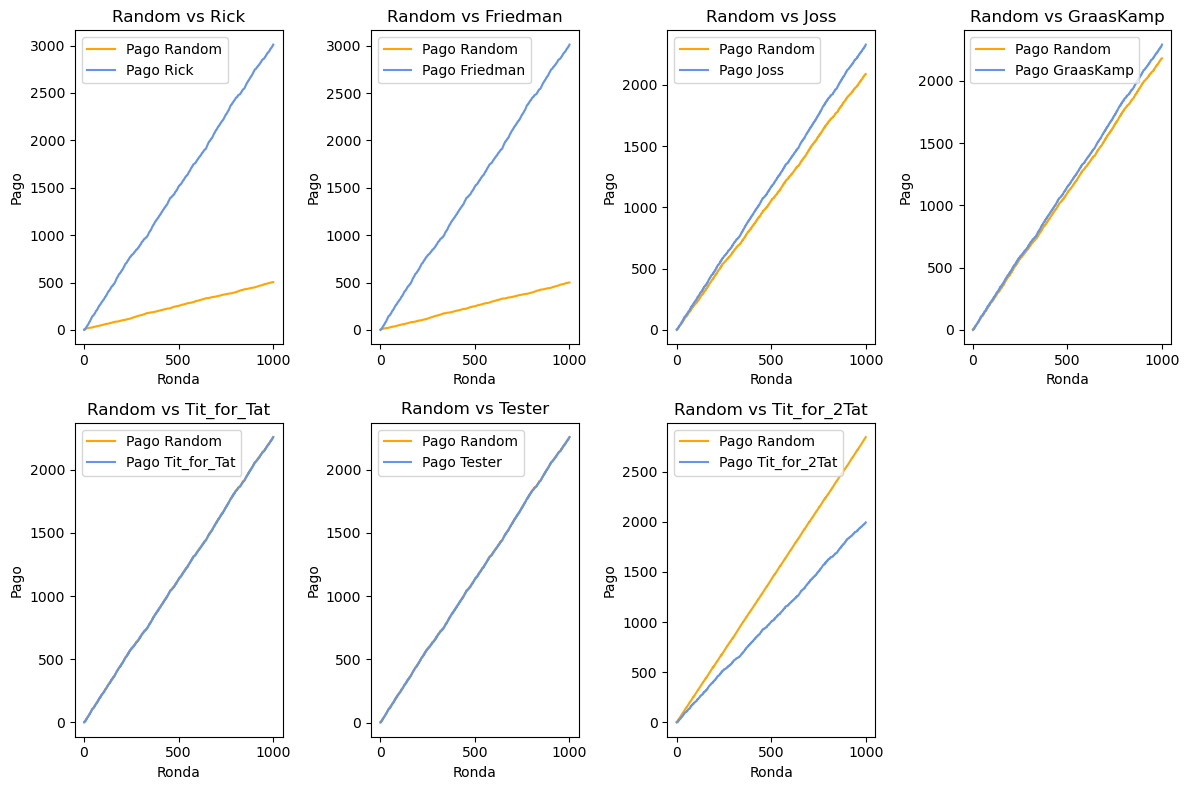

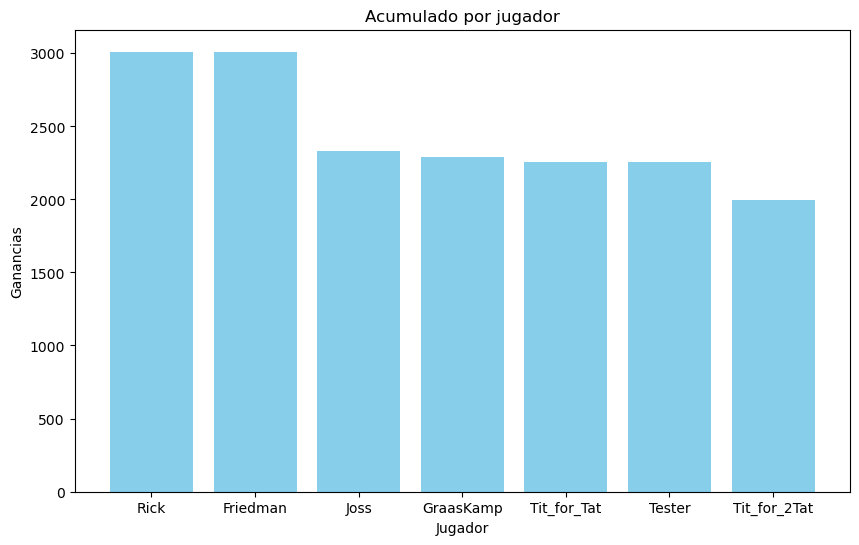

In [121]:
grafica_pagos(df_random, nombres_random, 'Random')
graficar_ganancias(df_random, nombres_random)